<a href="https://colab.research.google.com/github/XiaoxueRan/hku_phys3151_2022/blob/main/multivariate-linear-regression/multivariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Multivariate Linear Regression**

<table><tr> <font  size=3 color=navy face="微软雅黑"> In this case, we make a hypothesis linearly correlated to mutiple features(variables) based on the given data, and then make predictions according to the hypothesis.</font>


<font  size=3 color=navy face="微软雅黑"> A few examples of Multivariate Linear Regression are provided below. 

## **Example 1**

### Data Layer

<tr>Source: U.S. Census Bureau 
<br>Description: U.S. SMSA Retail Sales (1992) and Several covariates.

<tr>This data relates US per capita retail sales with parameters like per capita retail establishments, per capita income, etc. 
<br> SMAS stands for standard metropolitan statistical areas (a Metropolitan Statistical Area as one or more adjacent counties or county equivalents that have at least one urban core area of at least 50,000 population, plus adjacent territory that has a high degree of social and economic integration with the core as measured by commuting ties) .

<font  size=3 color=navy face="微软雅黑">First of all, we have a quick view of the data.

In [4]:
import numpy as np
import pandas as pd
from pandas import DataFrame

In [5]:
!git clone https://github.com/Plutooooo/hku_phys3151_2022

fatal: destination path 'hku_phys3151_2022' already exists and is not an empty directory.


In [6]:
df = pd.read_csv("/content/hku_phys3151_2022/multivariate-linear-regression/multivariate-linear-regression-example-1.csv", sep=",")
pd.set_option('display.width', 100)
print(df.head(20).append(df.tail(20)))

           SMSA_name  ...  Males_per_100_females 
0         Acadia, LA  ...                      91
1            Ada, ID  ...                      97
2          Adams, CO  ...                      99
3          Adams, IN  ...                      96
4          Aiken, SC  ...                      94
5        Alachua, FL  ...                      96
6       Alamance, NC  ...                      91
7        Alameda, CA  ...                      97
8         Albany, NY  ...                      90
9      Albemarle, VA  ...                      96
10     Alexander, NC  ...                      99
11    Alexandria, VA  ...                      91
12       Allegan, MI  ...                      97
13      Allegany, MD  ...                      89
14     Allegheny, PA  ...                      88
15         Allen, IN  ...                      94
16         Allen, OH  ...                      99
17       Amherst, VA  ...                      93
18     Anchorage, AK  ...                     107


<table><br><font color=navy  size=3 face="微软雅黑"> From the data above, we see that except the <font> target </font> variable per capita retail, there are four features. Since this is a case of linear regression, we have to firstly check whether the variables are linearly correlated.

### Code Layer

<font  color=navy size=3 face="微软雅黑">  To plot the target with features:

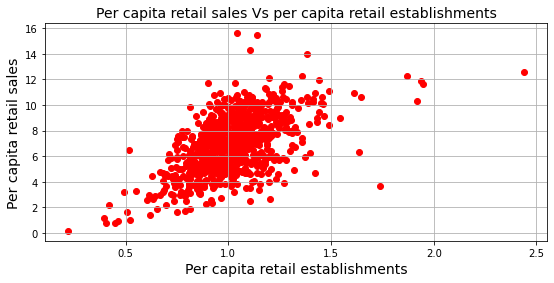

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9.0, 4.0)
plt.scatter( df['Per_capita_Retail_Establishments'],df['Per_capita_Retail_sales '], color='red')
plt.title('Per capita retail sales Vs per capita retail establishments', fontsize=14)
plt.xlabel('Per capita retail establishments', fontsize=14)
plt.ylabel('Per capita retail sales', fontsize=14)
plt.grid(True)
plt.show()

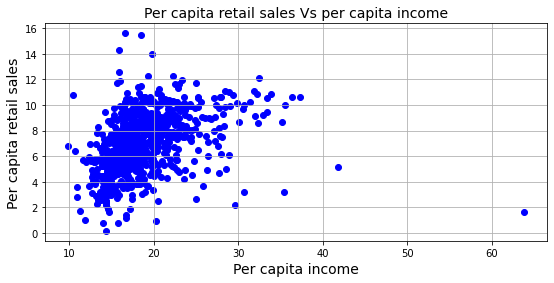

In [8]:
plt.scatter( df['Per_capita_income'],df['Per_capita_Retail_sales '], color='blue')
plt.title('Per capita retail sales Vs per capita income', fontsize=14)
plt.xlabel('Per capita income', fontsize=14)
plt.ylabel('Per capita retail sales', fontsize=14)
plt.grid(True)
plt.show()

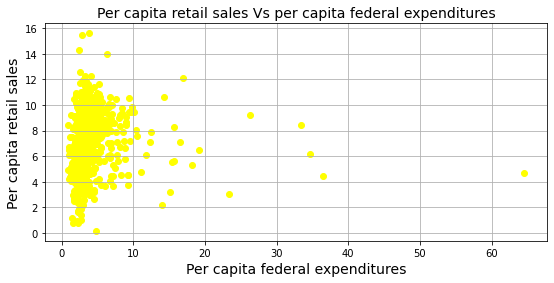

In [9]:
plt.scatter( df['Per_capita_federal_expenditures'],df['Per_capita_Retail_sales '], color='yellow')
plt.title('Per capita retail sales Vs per capita federal expenditures', fontsize=14)
plt.xlabel('Per capita federal expenditures', fontsize=14)
plt.ylabel('Per capita retail sales', fontsize=14)
plt.grid(True)
plt.show()

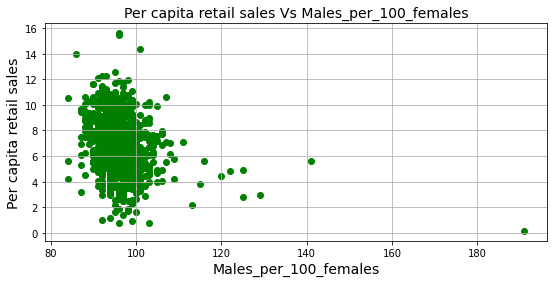

In [10]:
plt.scatter( df['Males_per_100_females '],df['Per_capita_Retail_sales '], color='green')
plt.title('Per capita retail sales Vs Males_per_100_females', fontsize=14)
plt.xlabel('Males_per_100_females', fontsize=14)
plt.ylabel('Per capita retail sales', fontsize=14)
plt.grid(True)
plt.show()

<table><br><font color=navy  size=3 face="微软雅黑"> These four plots show that our target variable (Per_capita_Retail_sales) is somewhat linearly correlated with the Per_capita_Retail_Establishment and Per_capita_income out of the four.</font>

<table><tr><font color=navy  size=3 face="微软雅黑">The next step is to set the data matrices.

In [11]:
# here we have 4 variables for multiple linear regression.
X = df[['Per_capita_Retail_Establishments','Per_capita_income','Per_capita_federal_expenditures','Males_per_100_females ']] 
Y = df['Per_capita_Retail_sales ']

<font  color=navy size=3 face="微软雅黑">sklearn is the gold standard package in machine learning for python, as such, it has exactly the regression tools we need.

In [12]:
from sklearn import linear_model
import statsmodels.api as sm
import pandas.util.testing as tm

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X.values, Y.values)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept: 
 2.3850230603786127
Coefficients: 
 [ 5.86477964  0.15279506  0.02715106 -0.04493364]


<table><tr><font  color=navy size=3 face="微软雅黑"> This represents that the regression produced by sklearn is a linear correlation given by equation \begin{equation}Y=C_1*X_1+C_2*X_2+C_3*X_3+C_4*X_4+Intercept\end{equation} where $C_i$s are the list of coefficients listed above，Y is the target variable and $X_i$s are the variables inside 'X'.
  <br><br>
 For the results on an intuitive level, this makes sense.<br> 1. Retail sales should be heavily correlated with the number of retail establishments. After all, you can't shop without shops; <br> 2. It should also be positively correlated with income and federal expenditure as these are sources where people get their money to consume;<br> 3. Retail sales should be negatively correlated here with the implication being that the females consume more.<br> These all intuitively make sense so we have our first assurance that the code is working as intended.


 <table><tr><font color=navy  size=3 face="微软雅黑"> After intuitively checking the feasibility of our hypothesis, we are making predictions.

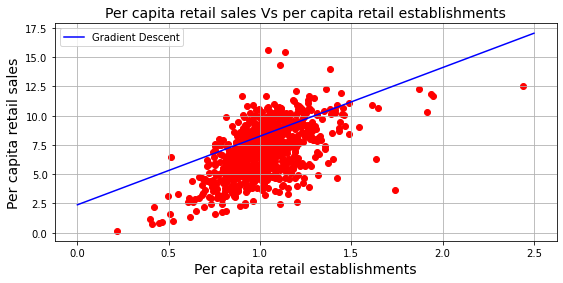

In [13]:
x = np.linspace(0,2.5,100)
y_grad = 2.38502+5.86478*x
plt.scatter(df['Per_capita_Retail_Establishments'],df['Per_capita_Retail_sales '], color='red')
plt.plot(x,y_grad,'b-',label='Gradient Descent',color='blue')
plt.title('Per capita retail sales Vs per capita retail establishments', fontsize=14)
plt.xlabel('Per capita retail establishments', fontsize=14)
plt.ylabel('Per capita retail sales', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

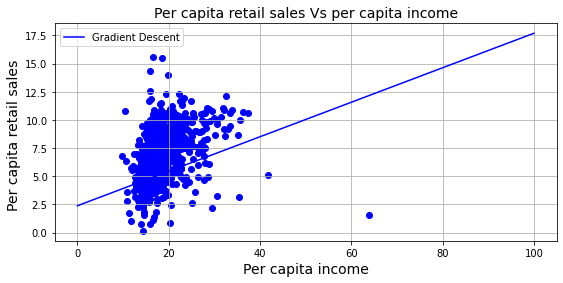

In [14]:
x = np.linspace(0,100,100)
y_grad = 2.38502+0.153*x

plt.scatter( df['Per_capita_income'],df['Per_capita_Retail_sales '], color='blue')
plt.plot(x,y_grad,'b-',label='Gradient Descent',color='blue')
plt.title('Per capita retail sales Vs per capita income', fontsize=14)
plt.xlabel('Per capita income', fontsize=14)
plt.ylabel('Per capita retail sales ', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


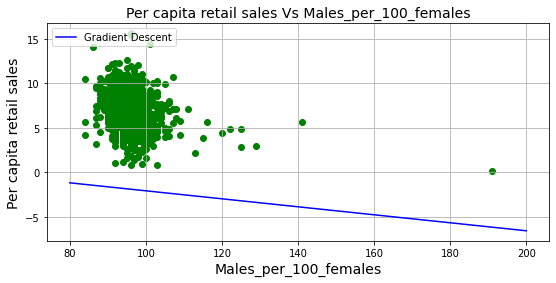

In [15]:
x = np.linspace(80,200,100)
y_grad = 2.38502-0.0449*x

plt.scatter( df['Males_per_100_females '],df['Per_capita_Retail_sales '], color='green')
plt.plot(x,y_grad,'b-',label='Gradient Descent',color='blue')
plt.title('Per capita retail sales Vs Males_per_100_females', fontsize=14)
plt.xlabel('Males_per_100_females', fontsize=14)
plt.ylabel('Per capita retail sales', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [16]:
# Set the variables
New_Per_capita_Retail_Establishments = 20
New_Per_capita_income = 20
New_Per_capita_federal_expenditures = 5
New_Males_per_100_females = 100
#Prediction
print ('Predicted Per Capita Retail Sales (1000s): ', regr.predict([[New_Per_capita_Retail_Establishments ,New_Per_capita_income,New_Per_capita_federal_expenditures,New_Males_per_100_females]]))

Predicted Per Capita Retail Sales (1000s):  [118.37890848]


<table><br><font color=navy  size=3 face="微软雅黑">The prediction model allows us to predict per capita retail sales given the other 4 variables.<br><br>

<font color=navy  size=3 face="微软雅黑">Now that we have our prediction model in place, we can examine the model using statistical methods found in package 'statsmodels'.

### Visualization Layer

In [17]:
# with statsmodels
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)
print('Note:"std err" means standard error ')

                               OLS Regression Results                               
Dep. Variable:     Per_capita_Retail_sales    R-squared:                       0.428
Model:                                  OLS   Adj. R-squared:                  0.425
Method:                       Least Squares   F-statistic:                     153.5
Date:                      Tue, 22 Feb 2022   Prob (F-statistic):           5.19e-98
Time:                              14:15:30   Log-Likelihood:                -1616.4
No. Observations:                       825   AIC:                             3243.
Df Residuals:                           820   BIC:                             3266.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<table><br><font  color=navy size=3 face="微软雅黑">Understanding every statistic in the funciton is not necessary, we list some of their interpretations.
    
<br> <font  color=navy size=3 face="微软雅黑">'R-squared': goodness of fit, which is the coefficient of determination and has a possible value from 0 to 1, with 1 being a perfect fit. 

<br><font  color=navy size=3 face="微软雅黑">F-statistic tries to test the hypothesis that all coefficients (except the intercept) are equal to zero. The null hypothesis is rejected if the F calculated from the data is greater than the critical value of the F-distribution for some desired false-rejection probability (e.g. 0.05). For example, if the probability for F-statistic is smaller than 0.05, then the null hypothesis is rejected, which means not all cofficients equal to zero.
    
<br><font  color=navy size=3 face="微软雅黑">To separately view the coeffients we get in the previous hypothesis, we can look at 'coef' which refers to the coeffients and next to it, the 'std err' means standard error. The 'std err' column shows standard errors of each coefficient estimate.

<br> <font  color=navy size=3 face="微软雅黑">The t-statistic and p-value columns are testing whether any of the coefficients might be equal to zero. 'p-value' -expresses the results of the hypothesis test as a significance level. Conventionally, p-values smaller than 0.05 are taken as evidence that the population coefficient is nonzero. Large values of t indicate that the null hypothesis can be rejected and that the corresponding coefficient is not zero.  
    
<br> <font  color=navy size=3 face="微软雅黑">'confidence intervals': random intervals around individual estimators that, if constructed for regressions over multiple samples, would contain the true population parameter, a certain fraction, e.g. 95%, of the time.
    
<br><font  color=navy size=3 face="微软雅黑">We can also directly check part of the difference between predictions and real data:<br /> 

Difference:  
 0   -0.487768
1    0.118486
2    0.208298
3    0.018165
4   -0.171567
5    0.147976
6    0.002461
7    0.019741
8    0.166701
9   -1.028865
dtype: float64 
 ... 
 815   -0.928077
816    0.138802
817    0.026472
818    0.188162
819    0.070090
820    0.107051
821   -0.086230
822   -0.686190
823   -0.116206
824    0.286974
dtype: float64


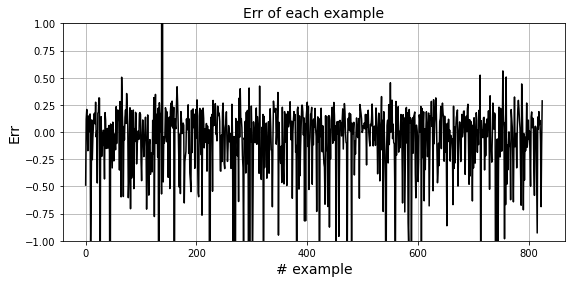

In [18]:
y_fitted =model.fittedvalues
err=(Y-y_fitted)/Y
print('Difference:',' \n',err.head(n=10),'\n','...','\n',err.tail(10))

plt.plot(err, color='black')
plt.title('Err of each example', fontsize=14)
plt.xlabel('# example', fontsize=14)
plt.ylabel('Err', fontsize=14)
plt.ylim(-1,1)
plt.grid(True)
plt.show()

<table><tr><font color=navy  size=3 face="微软雅黑">As the tooltip suggests, this fit isn't the best and there might be some other factors influencing the fitting, but this is a good first step in understanding multivarible linear regression. 

## **Example 2**

<table><tr><font  color=navy  size=3 face="微软雅黑">Next, we approach a different dataset where there are fewer data points, hopefully giving a clearer linear relationship.<br><br> Here, we use a cross sectional analysis of the running costs of British buses in the 50s.

### Data Layer

<table><tr>Dataset:  passenger1.dat
<br>Source: J. Johnston (1956), "Scale, Costs, and Profitability in Road
Passenger Transport," The Journal of Industrial Economics Vol 4, pp207-223.
<br>Description: Cross-sectional analysis of 24 British bus companies (1951).<br><br>This data analyses the cost per car mile of british buses with various characteristics of the buses.<br> One would forsee this data to be useful for various bus companies to determine what would be the most profitable way of running their buses. However, given that the data is from 1951, it is highly unlikely that they had the help of machine learning...

<table><tr><font color=navy  size=3 face="微软雅黑">Using the same method as above, we start with defining our dataframe and have a view of data both in numbers and figures. 

In [19]:
df = pd.read_csv("/content/hku_phys3151_2022/multivariate-linear-regression/multivariate-linear-regression-example-2.csv", sep=",")
pd.set_option('display.width', 200)
pd.set_option('display.max_rows', None)
print (df)

    Expenses_per_car_mile  ...  Receipts_per_car_mile
0                   19.76  ...                  25.10
1                   17.85  ...                  19.23
2                   19.96  ...                  21.42
3                   16.80  ...                  18.11
4                   18.20  ...                  19.24
5                   16.71  ...                  19.31
6                   18.81  ...                  20.07
7                   20.74  ...                  24.35
8                   16.56  ...                  17.60
9                   18.55  ...                  20.13
10                  17.40  ...                  18.40
11                  17.62  ...                  18.96
12                  21.24  ...                  25.75
13                  18.23  ...                  19.40
14                  16.86  ...                  18.64
15                  17.45  ...                  19.10
16                  17.66  ...                  20.00
17                  18.30  .

### Code Layer

<font color=navy>To plot:

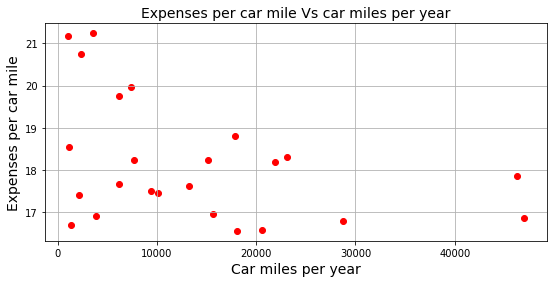

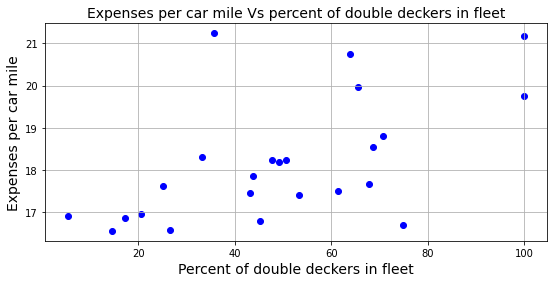

In [20]:
plt.scatter( df['Car_miles_per_year'],df['Expenses_per_car_mile'], color='red')
plt.title('Expenses per car mile Vs car miles per year', fontsize=14)
plt.xlabel('Car miles per year', fontsize=14)
plt.ylabel('Expenses per car mile', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter( df['Percent_of_Double_Deckers_in_fleet'],df['Expenses_per_car_mile'], color='blue')
plt.title('Expenses per car mile Vs percent of double deckers in fleet', fontsize=14)
plt.xlabel('Percent of double deckers in fleet', fontsize=14)
plt.ylabel('Expenses per car mile', fontsize=14)
plt.grid(True)
plt.show()

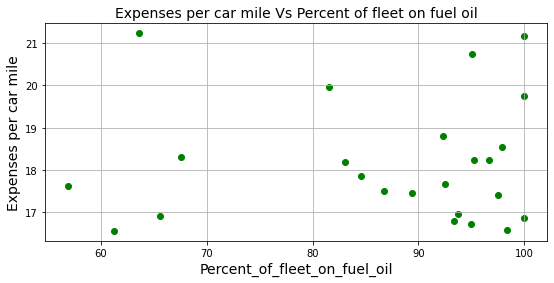

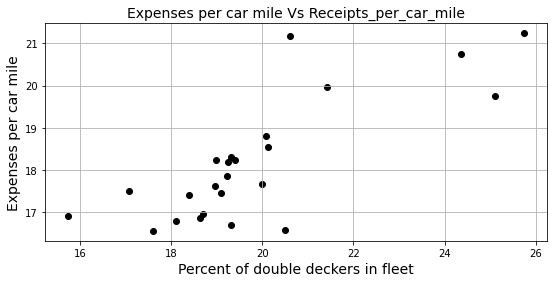

In [21]:
plt.scatter( df['Percent_of_fleet_on_fuel_oil'],df['Expenses_per_car_mile'], color='green')
plt.title('Expenses per car mile Vs Percent of fleet on fuel oil', fontsize=14)
plt.xlabel('Percent_of_fleet_on_fuel_oil', fontsize=14)
plt.ylabel('Expenses per car mile', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter( df['Receipts_per_car_mile'],df['Expenses_per_car_mile'], color='black')
plt.title('Expenses per car mile Vs Receipts_per_car_mile', fontsize=14)
plt.xlabel('Percent of double deckers in fleet', fontsize=14)
plt.ylabel('Expenses per car mile', fontsize=14)
plt.grid(True)
plt.show()

<table><tr><font color=navy  size=3 face="微软雅黑">This example has fewer datapoints, but broadly speaking one can still see that in the first plot the variable is negatively correlated while in the second plot the variable is positively correlated.

<table><tr><font color=navy  size=3 face="微软雅黑">Then, we set the data matrices and use the previous packages again.

In [22]:
X = df[['Car_miles_per_year','Percent_of_Double_Deckers_in_fleet','Percent_of_fleet_on_fuel_oil','Receipts_per_car_mile']] # Again, we have 4 variables for the linear regression.
Y = df['Expenses_per_car_mile']

In [23]:
from sklearn import linear_model
import statsmodels.api as sm

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X.values, Y.values)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 12.156944061183493
Coefficients: 
 [-5.71262276e-06  2.35488357e-02 -2.90647783e-02  3.76282333e-01]


<table><tr><font color=navy  size=3 face="微软雅黑">Substitute the coefficients and intercept into the equation：\begin{equation}Y=C_1*X_1+C_2*X_2+C_3*X_3+C_4*X_4+Intercept\end{equation}
We get our hypothesis.

<table><tr><font  color=navy size=3 face="微软雅黑">Now, using our hypothesis, let's predict the expenses_per_car_mile of  a bus company with 100% of buses running on fuel oil and 100% of buses being double deckers, and reciepts per car mile of 20, which is middling in the dataset, and the car miles per year being 10000, which is a reasonable number.

In [24]:
# prediction with sklearn
New_Car_miles_per_year = 10000
New_Percent_of_Double_Deckers_in_fleet = 100
New_Percent_of_fleet_on_fuel_oil = 100
New_Receipts_per_car_mile = 20

print ('Expenses per car mile: \n', regr.predict([[New_Car_miles_per_year,New_Percent_of_Double_Deckers_in_fleet,New_Percent_of_fleet_on_fuel_oil,New_Receipts_per_car_mile]]))


Expenses per car mile: 
 [19.07387024]


### Visualization Layer

<table><tr><font color=navy  size=3 face="微软雅黑">Again, the number is reasonable. Now, let's see the goodness of fit using the statistical package.

In [25]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                              OLS Regression Results                             
Dep. Variable:     Expenses_per_car_mile   R-squared:                       0.729
Model:                               OLS   Adj. R-squared:                  0.672
Method:                    Least Squares   F-statistic:                     12.80
Date:                   Tue, 22 Feb 2022   Prob (F-statistic):           3.22e-05
Time:                           14:15:31   Log-Likelihood:                -26.546
No. Observations:                     24   AIC:                             63.09
Df Residuals:                         19   BIC:                             68.98
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<table><br><font  color=navy size=3 face="微软雅黑">In this case, we can see that the R-squared is 0.729, much larger than that of example 1, so this fitting is better than the previous one but still not so perfect。

## **Example 3**

### Data Layer

<table><tr><font  color=navy size=3 face="微软雅黑">To round off our series of 3 examples, we will use a very simple dataset: Blood pressure in relation to weight and age. </font>
<br><tr><br>Source: http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html
<br>Here is a very simple dataset relating blood pressure to age and weight. The data is so closely correlated that it's very possible that the data is fabricated rather than collected.

<table><tr><font color=navy  size=3 face="微软雅黑">First, We have a view of the data in numbers and in figures

In [26]:
df = pd.read_csv("/content/hku_phys3151_2022/multivariate-linear-regression/multivariate-linear-regression-example-3.csv", sep=",")
pd.set_option('display.width', 120)
print (df)

    systolic blood pressure  age in years  weight in pounds
0                       132            52               173
1                       143            59               184
2                       153            67               194
3                       162            73               211
4                       154            64               196
5                       168            74               220
6                       137            54               188
7                       149            61               188
8                       159            65               207
9                       128            46               167
10                      166            72               217


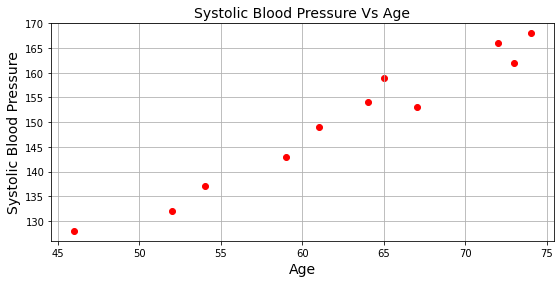

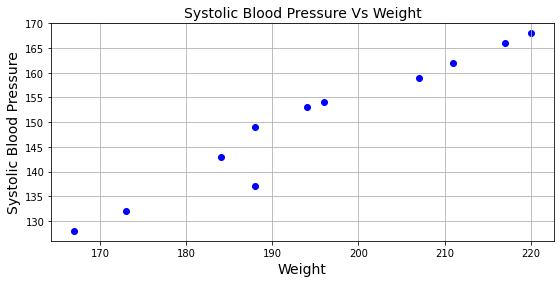

In [27]:
plt.scatter(df['age in years'], df['systolic blood pressure'], color='red')
plt.title('Systolic Blood Pressure Vs Age', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Systolic Blood Pressure', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['weight in pounds'], df['systolic blood pressure'], color='blue')
plt.title('Systolic Blood Pressure Vs Weight', fontsize=14)
plt.xlabel('Weight', fontsize=14)
plt.ylabel('Systolic Blood Pressure', fontsize=14)
plt.grid(True)
plt.show()

<table><tr><font  color=navy size=3 face="微软雅黑">With this dataset, the linearity is very clearly defined and thus, we can expect the regression fit to be very good.<br><br>Then ,we start getting our hypothesis.

In [28]:
X = df[['age in years','weight in pounds']] # This time, we only have 2 variables to fit to.
Y = df['systolic blood pressure']

In [29]:
from sklearn import linear_model
import statsmodels.api as sm

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X.values, Y.values)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 30.994102952348328
Coefficients: 
 [0.86141469 0.3348592 ]


<table><tr><font color=navy  size=3 face="微软雅黑">Substitute the coefficients and intercept into the equation：\begin{equation}Y=C_1*X_1+C_2*X_2+Intercept\end{equation}
The hypothesis is made and our next step is to make predictions as follows.

In [30]:
# prediction with sklearn
New_age = 50
New_weight = 100

print ('Systolic Blood Pressure: \n', regr.predict([[New_age,New_weight]]))


Systolic Blood Pressure: 
 [107.55075699]


<table><tr><font color=navy  size=3 face="微软雅黑">Clearly, we predicted that a person who weighs 100lb and is 50 years old should have a blood pressure of around 108, which is reasonable.

In [31]:
# prediction with sklearn
New_age = 20
New_weight = 250

print ('Systolic Blood Pressure: \n', regr.predict([[New_age,New_weight]]))


Systolic Blood Pressure: 
 [131.93719597]


<table><tr><font color=navy  size=3 face="微软雅黑">However, a person who's 20, but weighs 250lb should have a blood pressure of around 132, which seems a bit low medically speaking but still within the bounds of reason.

### Visualization Layer

<table><tr><font color=navy  size=3 face="微软雅黑">Finally, using the package statsmodels again, we check reliability of out hypothesis.

In [32]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     systolic blood pressure   R-squared:                       0.977
Model:                                 OLS   Adj. R-squared:                  0.971
Method:                      Least Squares   F-statistic:                     168.8
Date:                     Tue, 22 Feb 2022   Prob (F-statistic):           2.87e-07
Time:                             14:15:32   Log-Likelihood:                -23.106
No. Observations:                       11   AIC:                             52.21
Df Residuals:                            8   BIC:                             53.40
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<table><tr><font color=navy  size=3 face="微软雅黑">The goodness of fit here is defined by the R-squared metric in the upper right, as the number approaches 1, the better the fit. As we have seen previously, the Y variable is very well correlated with the two X variables, hence such a high R-squared value. One may contrast this with the R-squared values in the previous two examples which were around ~0.5-0.7. For reference, variables with no correlation have $R^2=0$ while variables which are totally correlated have $R^2=1$.

In [37]:
df = pd.read_csv("/content/hku_phys3151_2022/multivariate-linear-regression/multivariate-linear-regression-example-3.csv", sep=",")
df = df.to_numpy()
x = [df[:,1],df[:,2]]
x = np.array(x)
x = x.T
x = np.c_[np.ones((len(x),1)),x]
print(x)
q = (1/11)*(x.T.dot(x))
print(q)

[[  1.  52. 173.]
 [  1.  59. 184.]
 [  1.  67. 194.]
 [  1.  73. 211.]
 [  1.  64. 196.]
 [  1.  74. 220.]
 [  1.  54. 188.]
 [  1.  61. 188.]
 [  1.  65. 207.]
 [  1.  46. 167.]
 [  1.  72. 217.]]
[[1.00000000e+00 6.24545455e+01 1.95000000e+02]
 [6.24545455e+01 3.97609091e+03 1.23143636e+04]
 [1.95000000e+02 1.23143636e+04 3.82975455e+04]]


## **Example 4 (Cost Function, Gradient Descent & Conjugate Gra)**

<table><tr><font  color=navy size=3 face="微软雅黑">Here we will have an example of a single variable dataset to demonstrate the concept of a cost function. Furthermore, a method using conjugate gradient descent will be used.</font>
<br><tr><br>The data that will be used is the sulfur dioxide concentration (which cause acid rain) in the air related to the surface recession rate (which is an effect of acid rain) of marble tombstones.
<br>Data source:https://www.chegg.com/homework-help/questions-and-answers/1-read-r-use-response-variable-marble-tombstone-mean-surface-recession-rate-covariate-mean-q34698055

<br><font  color=navy size=3 face="微软雅黑">This dataset will be used for both cost function (gradient descent) and conjugate gradient.

### Data Layer

<table><tr><font color=navy  size=3 face="微软雅黑">First of all, we take a look at the data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/content/hku_phys3151_2022/multivariate-linear-regression/multivariate-linear-regression-example-4.csv", sep=",")

#Removing the label column
df = df [['Modelled_SO2_Concentration','Surface_Recession_Rate']]
dg = df
pd.set_option('display.width', 120)
print(df)

    Modelled_SO2_Concentration  Surface_Recession_Rate
0                           12                    0.27
1                           20                    0.14
2                           20                    0.33
3                           46                    0.81
4                           48                    0.84
5                           92                    1.08
6                           91                    1.78
7                           94                    1.21
8                          102                    1.09
9                          117                    1.72
10                         122                    1.18
11                         142                    1.01
12                         142                    1.90
13                         178                    1.98
14                         180                    1.53
15                         197                    2.71
16                         224                    2.41
17        

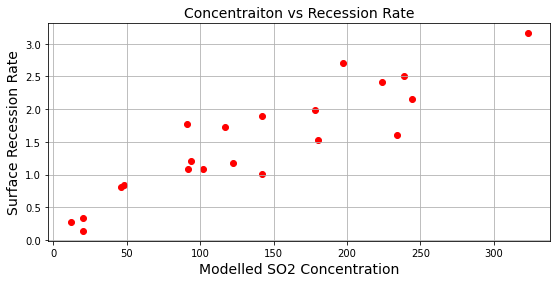

In [ ]:
plt.scatter(df['Modelled_SO2_Concentration'], df['Surface_Recession_Rate'], color='red')
plt.title('Concentraiton vs Recession Rate', fontsize=14)
plt.xlabel('Modelled SO2 Concentration', fontsize=14)
plt.ylabel('Surface Recession Rate', fontsize=14)
plt.grid(True)
plt.show()

<table><tr><font color=navy   size=3 face="微软雅黑">It is clear that the data is relatively well linearly correlated.
    

### Code Layer

In [ ]:
df = df.to_numpy()
X = df[:,0].reshape((-1, 1))
y = df[:,1].reshape((-1, 1))

<table><tr><font color=navy   size=3 face="微软雅黑"> 
Reshape your data using array.reshape(-1, 1) if your data has a single feature.

As with all machine learning tasks where the scalar distance is involved, this data needs to be scaled, meaning that any feature which has a high numerical value does not dominate the fit. Note, the y value does not need to be scaled because it is a vector and hence any scalar operations can be thought of as being performed *in the units of* y. In fact, if one does scales Y, then information is lost about the units of Y. This does not need to be done to the first three examples because the sklearn package presumably already scales the data in the fit and unscales it automatically.
<br><br>The feature scaling here is as forllows:

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)
print(scaler)

[[-1.03773585]
 [-0.96226415]
 [-0.96226415]
 [-0.71698113]
 [-0.69811321]
 [-0.28301887]
 [-0.29245283]
 [-0.26415094]
 [-0.18867925]
 [-0.04716981]
 [ 0.        ]
 [ 0.18867925]
 [ 0.18867925]
 [ 0.52830189]
 [ 0.54716981]
 [ 0.70754717]
 [ 0.96226415]
 [ 1.05660377]
 [ 1.10377358]
 [ 1.1509434 ]
 [ 1.89622642]]
RobustScaler()


<table><tr><font color=navy   size=3 face="微软雅黑">Now, we define functions for cost funciton and gradient descent.

In [ ]:
X = X_scaled
def  computeCost(theta,X,y):
    m = float(len(y))
    
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions-y))
    return cost

<table><tr><font color=navy   size=3 face="微软雅黑">The cost function is defined as follows:<br>$$J:=\frac{1}{2m}\sum_{i=1}^m (h_{\theta}(x_i)-y_i)^2 $$ where m depends on the training set.
<br>Gradient descent is uesd to search the minimum and the definition is: <br>$$\theta:=\theta-\alpha\frac{\partial}{\partial \theta}J(\theta)$$
where $\alpha$ is a number called learning rate.

In [ ]:
def gradient_descent(X,y,theta,alpha=0.1,iterations=200):
    m = float(len(y))
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*alpha*( X.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(theta,X,y)
        
    return theta, cost_history, theta_history

[[-0.47380521]
 [ 0.79301832]]
[[ 1.         -1.03773585]
 [ 1.         -0.96226415]
 [ 1.         -0.96226415]
 [ 1.         -0.71698113]
 [ 1.         -0.69811321]
 [ 1.         -0.28301887]
 [ 1.         -0.29245283]
 [ 1.         -0.26415094]
 [ 1.         -0.18867925]
 [ 1.         -0.04716981]
 [ 1.          0.        ]
 [ 1.          0.18867925]
 [ 1.          0.18867925]
 [ 1.          0.52830189]
 [ 1.          0.54716981]
 [ 1.          0.70754717]
 [ 1.          0.96226415]
 [ 1.          1.05660377]
 [ 1.          1.10377358]
 [ 1.          1.1509434 ]
 [ 1.          1.89622642]]
1.7969100788699173
Theta0:          1.371,
Theta1:          0.911
Final cost/MSE:  0.060
theta_history is [[-0.28767135  0.82589776]
 [-0.12060137  0.85410771]
 [ 0.02937508  0.87821035]
 [ 0.16402364  0.89870461]
 [ 0.28492653  0.91603306]
 [ 0.39350171  0.9305881 ]
 [ 0.49101994  0.94271738]
 [ 0.57862016  0.95272875]
 [ 0.65732318  0.96089459]
 [ 0.72804401  0.96745577]
 [ 0.79160286  0.97262507

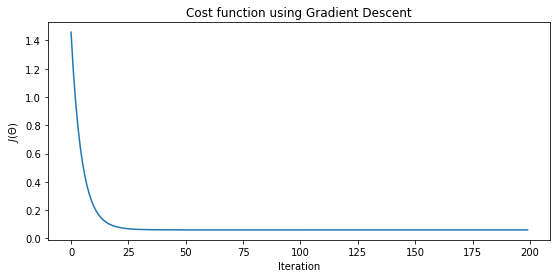

In [ ]:
alpha =0.1
n_iter = 200

theta = np.random.randn(2,1)
print(theta)
X_b = np.c_[np.ones((len(X),1)),X]
print(X_b)
print(computeCost(theta,X_b,y))

theta,cost_history,theta_history = gradient_descent(X_b,y,theta,alpha,n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
c=[]
print('theta_history is',theta_history)
print(theta_history[0])
for i in range(len(theta_history)):
    c.append([theta_history[i][0],theta_history[i][1]])
print(c)

<table><tr><font  color=navy  size=3 face="微软雅黑">Note, a column of 1's is added to the data matrix to form the design matrix. This is necessary because the column of 1's multiplies with $\theta_0$ to provide the intercept of the fit.

<table><tr><font  color=navy  size=3 face="微软雅黑">To view the process of gradient descent, here we plot the cost_history:

Text(0.5, 1.0, 'Cost function using Gradient Descent')

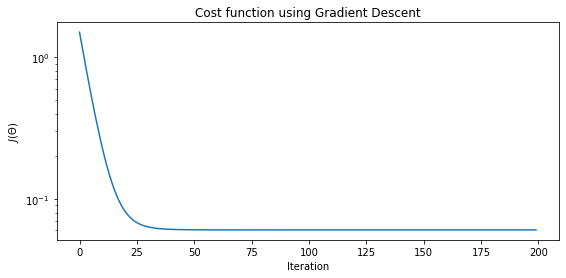

In [ ]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.yscale("log")
plt.title("Cost function using Gradient Descent")

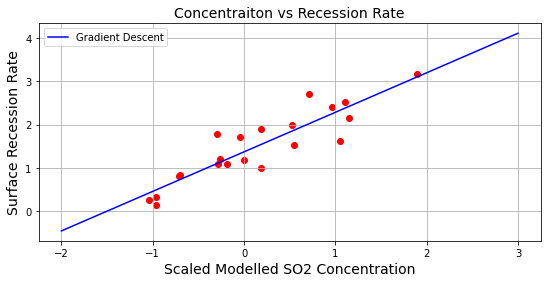

In [ ]:
x = np.linspace(-2,3,100)
y_grad = 1.371+0.911*x

plt.scatter(X, y, color='red')
plt.plot(x,y_grad,'b-',label='Gradient Descent',color='blue')
plt.title('Concentraiton vs Recession Rate', fontsize=14)
plt.xlabel('Scaled Modelled SO2 Concentration', fontsize=14)
plt.ylabel('Surface Recession Rate', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


<table><tr><font  color=navy  size=3 face="微软雅黑">The figure shows that in gradient descent, the cost function rapidly drops and then slows after many iterations, i.e. the rate of descent slows as the optimum value is approached.

#### Conjugate Gradient Descent

<table><tr><font color=navy   size=3 face="微软雅黑">In essence, conjugate gradient descent is a method of solving a linear equation of the form $Ax=b$. Here, in the context of fitting data, A is the 'X' component(design matrix) and b is the 'y' component as written in the above problem and 'x' is the vector $\theta$.
    <br><br>The objective of conjugate gradient descent, just like previously, is to minimize the cost function. The cost function is equivalent to the one above, but can be written in another way.

<table><tr><font color=navy   size=3 face="微软雅黑">Since the cost function can be written as $J(\theta)=\frac{1}{2}(X\theta-y)^T (X\theta-y)$.
This can also be written in the quadratic form $J(\theta) = \frac{1}{2}(\theta^T X^T X\theta)-(\theta^T X^T y)-(y^T X \theta)+y^T y$. Then the objective of conjugate gradient: minimizing that function can be performed.

In [ ]:
def findcost(X,theta,y):                                  #cost function as above
    J = 0.5*np.matmul(((X.dot(theta)-y).T),(X.dot(theta)-y))
    return J

In [ ]:
theta = np.zeros((2,1))

In [ ]:
A = X_b.T @ X_b
b = (X_b.T @ y)+ np.linalg.pinv(theta.T) @ y.T @ X_b @ theta
c = y.T @ y

<table><tr><font color=navy   size=3 face="微软雅黑">It may be proven that A is a symmetric and positive-definite matrix.  

<table><tr><font color=navy   size=3 face="微软雅黑">If one were to try and solve the problem using conjugate gradient descent as a black box, the algorithm below would be used.

In [ ]:
from scipy.sparse.linalg import cg
cg(A,b)

(array([1.37138254, 0.91089331]), 0)

<table><tr><font  color=navy  size=3 face="微软雅黑">Comparing the two results from gradient descent and conjugate descent overlayed on the original data.

In [ ]:

y_grad = 1.371+0.911*X
y_cg = 1.37138254+0.91089331*X

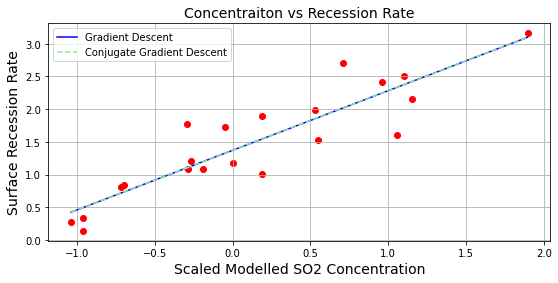

In [ ]:
#XX,y_grad,y_cg=X.reshape((1,len(X))),y_grad.reshape((1,len(X))),y_cg.reshape((1,len(X)))
plt.scatter(X, y, color='red')
plt.plot(X,y_grad,'b-',label='Gradient Descent',color='blue')
plt.plot(X,y_cg,'b-',label='Conjugate Gradient Descent',color='lightgreen',ls='--')
plt.title('Concentraiton vs Recession Rate', fontsize=14)
plt.xlabel('Scaled Modelled SO2 Concentration', fontsize=14)
plt.ylabel('Surface Recession Rate', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

<table><tr><font  color=navy  size=3 face="微软雅黑">As the figure demonstrates, both fits are reasonable fits, now, let's dwelve into the inner workings of the algorithm of conjugate gradient descent.
<br><br>Given that we now have the cost function in the required quadratic form: $f(x)=x^T A x - x^T b +c$, we can now start to minimize the function using conjugate gradient descent.

In [ ]:
def conjugate_gradient(A,b,atol=10**(-1000),x = np.zeros((len(A),1))):
    r = b - A @ x
    cost_history_cg = []
    x_history=[]
    x_history.append([x[0][0],x[1][0]])
    while r.mean() > atol:
        r = b - A @ x
        p = r
        alpha = (r.T @ r)/(p.T @ A @ p)
        x = x + alpha*p
        x_history.append([x[0][0],x[1][0]])
        r = r - alpha*A @ p
        beta = (r.T @ r)/(p.T @ p)
        p = r + beta*p
        cost_history_cg.append(computeCost(x,A,b))
    return x, cost_history_cg,x_history

In [ ]:
np.seterr(divide='ignore',invalid='ignore')
theta,cost_history_cg ,theta_history_cg= conjugate_gradient(A,b)
print('theta_history is',theta_history_cg)

theta_history is [[0.0, 0.0], [1.4432017803357207, 0.7475398001791788], [1.3618638937762906, 0.9045708808830797], [1.3718810336036298, 0.9097594905473181], [1.3713164743063593, 0.9108494298157433], [1.3713860024151017, 0.9108854435105879], [1.3713820838574207, 0.9108930086856062], [1.3713825664460626, 0.9108932586535746], [1.3713825392476895, 0.9108933111628059], [1.3713825425972959, 0.9108933128978122], [1.3713825424085144, 0.9108933132622742], [1.3713825424317638, 0.9108933132743166], [1.3713825424304533, 0.9108933132768464], [1.3713825424306147, 0.91089331327693], [1.3713825424306056, 0.9108933132769476], [1.3713825424306068, 0.9108933132769482], [nan, nan]]


In [ ]:
y_cg2 = theta[0]+theta[1]*X

<table><tr><font color=navy   size=3 face="微软雅黑">Now, we compare the 3 fittings together with the initial data in the figure below

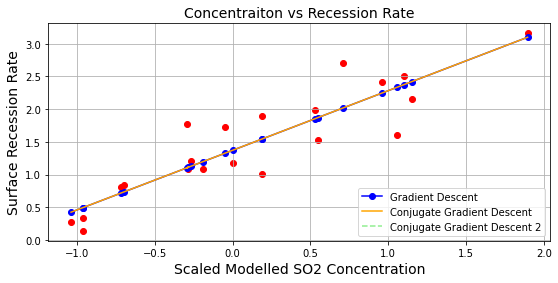

In [ ]:
plt.scatter(X, y, color='red')
plt.plot(X,y_grad,'ob-',label='Gradient Descent',color='blue')
plt.plot(X,y_cg,'g-',label='Conjugate Gradient Descent',color='orange')
plt.plot(X,y_cg2,'-',label='Conjugate Gradient Descent 2',color='lightgreen',ls='--')
plt.title('Concentraiton vs Recession Rate', fontsize=14)
plt.xlabel('Scaled Modelled SO2 Concentration', fontsize=14)
plt.ylabel('Surface Recession Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<table><tr><font color=navy   size=3 face="微软雅黑">Again, nice fit.<br /> 
    <br>
In addition, have a look at the working of both gradient descent and conjugate gradient descent by plotting the cost function

Text(0.5, 1.0, 'Comparison of Cost Function from Different methods')

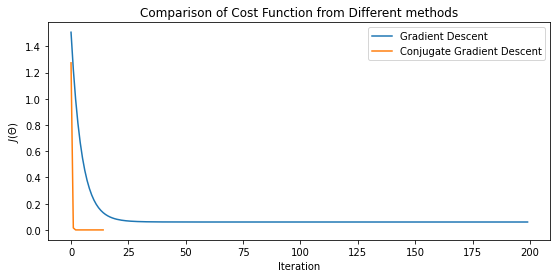

In [ ]:
plt.plot(cost_history,label='Gradient Descent')
plt.plot(cost_history_cg,label='Conjugate Gradient Descent')
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.legend(loc='best')
plt.title("Comparison of Cost Function from Different methods")

<table><tr><font color=navy   size=3 face="微软雅黑">As the figure shows, the conjugate gradient descent method converges much quicker, and converges to a smaller value.

### 3D plot

# New Section

<table><tr><font color=navy  size=3 face="微软雅黑">Here, we try to show the cost function in $\theta$-space.

In [ ]:
def computeCost2(theta0,theta1):
    J = 0
    m = len(X)
    for i in range(m):
        J=J+(1/(2*m)) * np.square(theta0+X[i]*theta1-y[i])
    return J

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


A=theta_history[:,0].tolist() #theta0
B=theta_history[:,1].tolist()  #theta1
A1=np.linspace(-1.5,3,100).tolist()# To make the surface complete
B1=np.linspace(-1.5,3,100).tolist()

A1,B1= np.meshgrid(A1,B1) 
C=computeCost2(A1,B1)

<table><tr><font color=navy  size=3 face="微软雅黑">Note that the single red point in the bottom is the cost function we got previously.
<br>The figure shows how the cost function changes in the $\theta$-space and its minimum accords with the single point.

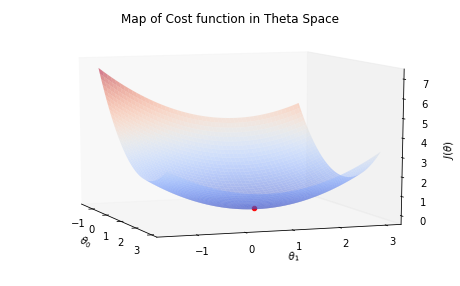

In [ ]:
from matplotlib import rc
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook



#rc('text', usetex=True)
fig = plt.figure(figsize=(8,5))
ax1 = plt.axes(projection='3d')
ax1.set_facecolor('white')
ax1.grid(False)
ax1.set_title('Map of Cost function in Theta Space')
ax1.set_xlabel(r"$\theta_0$")
ax1.set_ylabel(r"$\theta_1$")
ax1.set_zlabel(r"$J(\theta)$")
surf1 = ax1.plot_surface(A1, B1, C,alpha=0.5,cmap=cm.coolwarm)
s2 = ax1.scatter(1.371,0.911,computeCost2(1.371,0.911),c='r')     #plot the single point using the 'theta's we got previously
ax1.view_init(10, -20)
plt.show()